In [1]:
from graphviz import Source
from lambekseq.semcomp import SemComp

SemComp.load_lexicon(abbr_path='../abbr.json',
                     vocab_path='../schema.json')


Semgraphs (semantic graphs) are an extension of AMR that explicitly represent quantification, scope, plurality, conjunction and disjunction. Semgraphs emphasize descriptive adequacy that theretical linguistis (semantics in particular) cares about.
We start with a simple sentence: "a boy walked a dog'.

In [2]:
ex0a = [('a', 'ind'), ('boy', 'n'), 
       ('walked', 'vt'), ('a', 'ind'), ('dog', 'n')]
sc = SemComp(ex0a)
sc.unify()

The semgraph of this sentence is composed of those of its words. For example, "boy" and "walked" are as follows:

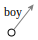

In [3]:
Source(sc.tokens[1].dot_styled)

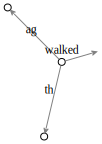

In [4]:
Source(sc.tokens[2].dot_styled)

Semantic composition is simply identifying discourse referents. In this example, the entity that is a boy equals the agent of a wlaking event. The semgraph of `ex0a` looks like this:

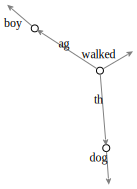

In [5]:
Source(sc.semantics[0].dot_styled)

This graph pins down a walking event, a boy and a dog. The boy is the agent of walking. The dog is the theme of walking. The encoding of this graph resembles the queries of SPARQL:

In [7]:
print(sc.semantics[0].dot)

strict digraph  {
i0 [label=""];
g2u0 [height=0, label="", shape=plaintext, width=0];
i1 [label=""];
g3a0 [label=""];
g3u0 [height=0, label="", shape=plaintext, width=0];
g5u0 [height=0, label="", shape=plaintext, width=0];
i0 -> g2u0  [len="0.5", xlabel=boy];
i1 -> g5u0  [len="0.5", xlabel=dog];
g3a0 -> g3u0  [len="0.5", xlabel=walked];
g3a0 -> i1  [xlabel=th];
g3a0 -> i0  [xlabel=ag];
}



Let's move onto quantifiers: "every boy walked a dog".

In [8]:
ex0b = [('every', 'qnt'), ('boy', 'n'), 
       ('walked', 'vt'), ('a', 'ind'), ('dog', 'n')]
sc = SemComp(ex0b)
sc.unify()

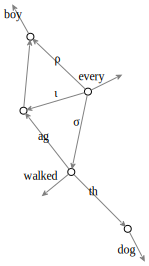

In [9]:
Source(sc.semantics[0].dot_styled)

Intuitively, this graph encodes a program: for a set of boys, pull each x out of it, then x is the agent of a walking event, whose theme is a dog.
We explicitly represent quantification encoded by "every", and we distinguish such genuine quantifiers from indefinites like "a dog".
In this example, the value of "a dog" can vary across boys. We can fix the value "a dog" by valuating it before quantification, deriving a reading where there is a specific dog such that every boy walked it. This is known in linguistics as "a dog" taking scope over "every boy".

In [10]:
ex0c = [('every', 'qnt'), ('boy', 'n'), 
       ('walked', 'vt'), ('a', 'indl'), ('dog', 'n')]
xref0c = [('g4x0', 'g1a0')]
sc = SemComp(ex0c, xref0c)
sc.unify()

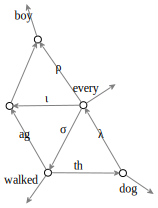

In [11]:
Source(sc.semantics[0].dot_styled)

Long story short, `ex0c` has an additional lambda-edge from "dog" to "every". The net effect is to have the former valued before the latter. Technically, this relates to the definition of the root of a graph that contains a lambda-cycle. We skip over the details.

What if we have two quantifiers? "every boy walked most dogs"

In [12]:
ex1a = [('every', 'qnt'), ('boy', 'n'), 
       ('walked', 'vt'), ('most', 'qnt'), ('dogs', 'n')]
sc = SemComp(ex1a)
sc.unify()

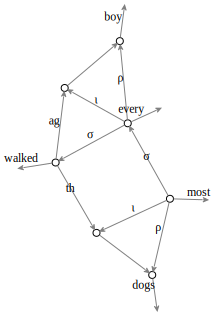

In [13]:
Source(sc.semantics[0].dot_styled)

The root of an acylic graph is the node that has 0 incoming edges. Recall the quantification program from above. This semgraph reads as "for the most part of a set of dogs, each member x is such that for a set of boys, each member y is such that there is a walking, its agent is y, its theme is x." In other words, "most dogs" is considered before "every boy".

The same sentence has another reading where "every boy" is considered before "most dogs".

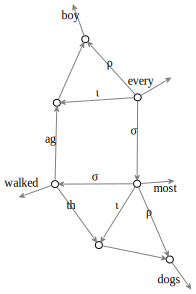

In [14]:
Source(sc.semantics[1].dot_styled)

In general, when there are `n` quantifiers, we have `n!` scope permutations.

In [16]:
ex1b = [('every', 'qnt'), ('boy', 'n'), 
       ('walked', 'vt'), ('most', 'qnt'), ('dogs', 'n'),
       ('in', 'pv'), ('every', 'qnt'), ('park', 'n')]
sc = SemComp(ex1b, calc='ccg')
sc.unify()

In [17]:
len(sc.semantics)

6

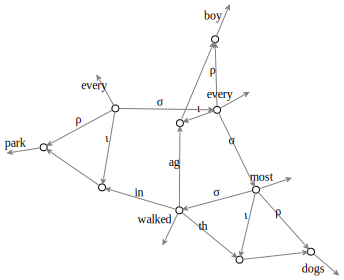

In [18]:
Source(sc.semantics[0].dot_styled)

The above is one of those 6 readings: every park >> every boy >> most dogs

Here is an example of donkey sentences: "every boy who walked a dog fed it." The value of "it" co-varies with "boy".

In [21]:
ex2 = [('every', 'qnt'), ('boy', 'n'), 
      ('who', 'rl'), ('walk', 'vt'), ('a', 'ind'), ('dog', 'n'),
      ('fed', 'vt'), ('it', 'pro')]
xref2 = [('g8x0', 'g6a0')]
sc = SemComp(ex2, xref2)
sc.unify()

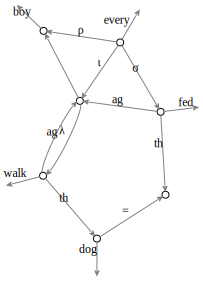

In [22]:
Source(sc.semantics[0].dot_styled)

Let's move onto explicit conjunction and split antecedents of pronouns.

In [19]:
ex3 = [('Joe', 'prp'), ('walked', 'vt'), ('and', 'cj'), 
      ('Ben', 'prp'), ('fed', 'vt'), ('his', 'pros'), ('dog', 'n')]
xref3 = [('g6x0', 'g1a0'), ('g6x1', 'g4a0')]
sc = SemComp(ex3, xref3)
sc.unify()

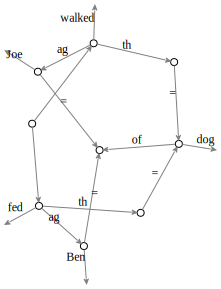

In [20]:
Source(sc.semantics[0].dot_styled)

Here we are summing two events, one is Joe's walking his dog, the other Ben's feeding his dog. Conjoining "Joe walked" and "Ben fed" ends up with having them share the theme syntactically. "his" refers to Joe in the first conjunct, but Ben in the second conjunct.